In [284]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error

In [285]:
df = pd.read_csv("https://raw.githubusercontent.com/byoung6/covid/lings_branch/csv/cleanSelection4ML.csv")
df.head(5)

,index,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations
0,6490,2021-11-15,Argentina,South America,1298.571,565.0,12.389,15.286,356203.0,60.26,1.96,0.187,27479827.0,892457.0,1297018.0
1,6495,2021-11-20,Argentina,South America,1364.429,572.0,12.542,20.857,440583.0,62.23,2.77,0.122,28379784.0,1263315.0,214081.0
2,6496,2021-11-21,Argentina,South America,1372.286,561.0,12.301,20.714,425164.0,62.36,2.84,0.103,28439413.0,1294189.0,114402.0
3,6497,2021-11-22,Argentina,South America,1261.429,566.0,12.411,18.857,258749.0,62.50,2.91,0.108,28505739.0,1327224.0,132111.0
4,6498,2021-11-23,Argentina,South America,1264.571,570.0,12.498,17.286,255271.0,62.81,3.11,0.110,28645100.0,1420213.0,300974.0


# Cleaning Data

In [286]:
# looking at info on our selected columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5539 non-null   int64  
 1   date                                        5539 non-null   object 
 2   location                                    5539 non-null   object 
 3   continent                                   5539 non-null   object 
 4   new_cases_smoothed                          5539 non-null   float64
 5   icu_patients                                5539 non-null   float64
 6   icu_patients_per_million                    5539 non-null   float64
 7   new_deaths_smoothed                         5539 non-null   float64
 8   new_vaccinations_smoothed                   5539 non-null   float64
 9   people_fully_vaccinated_per_hundred         5539 non-null   float64
 10  total_booste

In [287]:
# checking for nulls
df.isnull().sum()

index                                         0
date                                          0
location                                      0
continent                                     0
new_cases_smoothed                            0
icu_patients                                  0
icu_patients_per_million                      0
new_deaths_smoothed                           0
new_vaccinations_smoothed                     0
people_fully_vaccinated_per_hundred           0
total_boosters_per_hundred                    0
new_people_vaccinated_smoothed_per_hundred    0
people_fully_vaccinated                       0
total_boosters                                0
new_vaccinations                              0
dtype: int64

In [288]:
# dropping nulls
clean_selection = df.dropna()

In [289]:
# double checking there are no nulls after drop
clean_selection.isnull().sum()

index                                         0
date                                          0
location                                      0
continent                                     0
new_cases_smoothed                            0
icu_patients                                  0
icu_patients_per_million                      0
new_deaths_smoothed                           0
new_vaccinations_smoothed                     0
people_fully_vaccinated_per_hundred           0
total_boosters_per_hundred                    0
new_people_vaccinated_smoothed_per_hundred    0
people_fully_vaccinated                       0
total_boosters                                0
new_vaccinations                              0
dtype: int64

In [290]:
#  1. Get the total vaccination rate for north america
usa_vaccination = df.groupby('location')
usa_vaccination

In [291]:
for location, location_df in usa_vaccination:
    print(location)
    print(location_df)

Argentina
    index        date   location      continent  new_cases_smoothed  \
0    6490  2021-11-15  Argentina  South America            1298.571   
1    6495  2021-11-20  Argentina  South America            1364.429   
2    6496  2021-11-21  Argentina  South America            1372.286   
3    6497  2021-11-22  Argentina  South America            1261.429   
4    6498  2021-11-23  Argentina  South America            1264.571   
..    ...         ...        ...            ...                 ...   
62   6584  2022-02-17  Argentina  South America           14203.000   
63   6585  2022-02-18  Argentina  South America           14043.857   
64   6586  2022-02-19  Argentina  South America           13541.714   
65   6589  2022-02-22  Argentina  South America           12778.571   
66   6590  2022-02-23  Argentina  South America           12140.000   

    icu_patients  icu_patients_per_million  new_deaths_smoothed  \
0          565.0                    12.389               15.286   
1  

In [292]:
usa_vaccination.get_group('United States')

,index,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations
5342,156488,2021-08-13,United States,North America,128519.857,20076.0,60.304,654.429,714641.0,51.94,0.00,0.140,172448325.0,13708.0,946795.0
5343,156489,2021-08-14,United States,North America,129633.714,20401.0,61.280,655.857,724200.0,52.01,0.01,0.139,172689810.0,49662.0,624091.0
5344,156490,2021-08-15,United States,North America,131253.000,21077.0,63.310,665.429,731162.0,52.06,0.02,0.138,172850612.0,82479.0,398560.0
5345,156491,2021-08-16,United States,North America,136733.571,21673.0,65.101,742.429,743652.0,52.17,0.05,0.136,173203214.0,161912.0,868638.0
5346,156492,2021-08-17,United States,North America,141249.714,22303.0,66.993,765.714,761348.0,52.28,0.08,0.134,173565158.0,260778.0,921824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,156680,2022-02-21,United States,North America,87729.143,10458.0,31.413,1892.714,333675.0,64.59,28.16,0.026,214451304.0,93500011.0,297125.0
5535,156681,2022-02-22,United States,North America,84220.571,10182.0,30.584,1821.000,324436.0,64.62,28.20,0.025,214538081.0,93639190.0,312998.0
5536,156682,2022-02-23,United States,North America,79870.857,9627.0,28.917,1782.714,311987.0,64.64,28.24,0.024,214618039.0,93773340.0,296732.0
5537,156683,2022-02-24,United States,North America,74750.286,9410.0,28.265,1742.000,294823.0,64.66,28.28,0.023,214685560.0,93893552.0,259048.0


In [293]:
location_df.head(10)

,index,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations
5342,156488,2021-08-13,United States,North America,128519.857,20076.0,60.304,654.429,714641.0,51.94,0.00,0.140,172448325.0,13708.0,946795.0
5343,156489,2021-08-14,United States,North America,129633.714,20401.0,61.280,655.857,724200.0,52.01,0.01,0.139,172689810.0,49662.0,624091.0
5344,156490,2021-08-15,United States,North America,131253.000,21077.0,63.310,665.429,731162.0,52.06,0.02,0.138,172850612.0,82479.0,398560.0
5345,156491,2021-08-16,United States,North America,136733.571,21673.0,65.101,742.429,743652.0,52.17,0.05,0.136,173203214.0,161912.0,868638.0
5346,156492,2021-08-17,United States,North America,141249.714,22303.0,66.993,765.714,761348.0,52.28,0.08,0.134,173565158.0,260778.0,921824.0
5347,156493,2021-08-18,United States,North America,143192.143,22700.0,68.186,822.286,787492.0,52.39,0.11,0.134,173942086.0,376273.0,950877.0
5348,156494,2021-08-19,United States,North America,144538.571,23034.0,69.189,932.143,807692.0,52.51,0.15,0.132,174321427.0,489508.0,943057.0
5349,156495,2021-08-20,United States,North America,146546.714,23399.0,70.285,992.714,830297.0,52.65,0.18,0.130,174797463.0,610280.0,1105031.0
5350,156496,2021-08-21,United States,North America,148581.429,23653.0,71.048,1034.143,836045.0,52.74,0.20,0.129,175093189.0,671403.0,664326.0
5351,156497,2021-08-22,United States,North America,148026.000,24082.0,72.337,1033.429,834585.0,52.79,0.21,0.127,175271426.0,702797.0,388341.0


# Linear Regression Model

(197,)


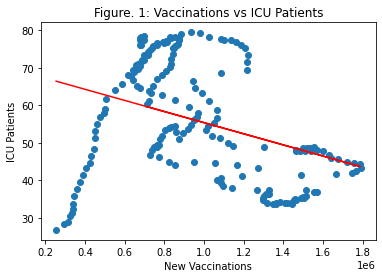

In [294]:
X = location_df.new_vaccinations_smoothed.values.reshape(-1, 1)
y = location_df.icu_patients_per_million
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('New Vaccinations')
plt.ylabel('ICU Patients')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.plot(X, y_pred, color='red')
plt.show()

In [295]:
y[:10]

5342    60.304
5343    61.280
5344    63.310
5345    65.101
5346    66.993
5347    68.186
5348    69.189
5349    70.285
5350    71.048
5351    72.337
Name: icu_patients_per_million, dtype: float64

In [296]:
y_pred[:10]

array([59.61950839, 59.47770759, 59.3744314 , 59.18915134, 58.92664408,
       58.53881688, 58.2391646 , 57.90383589, 57.8185685 , 57.84022654])

(197,)


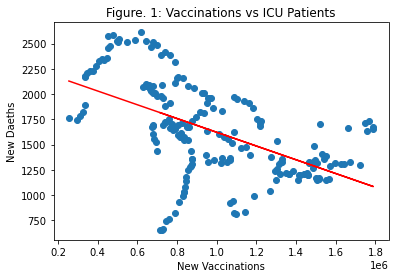

In [297]:
X = location_df.new_vaccinations_smoothed.values.reshape(-1, 1)
y = location_df.new_deaths_smoothed
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('New Vaccinations')
plt.ylabel('New Daeths')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.plot(X, y_pred, color='red')
plt.show()

# Coorelation Tested

In [298]:
location_df.corr()

,index,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations
index,1.000000,0.478815,-0.288085,-0.288087,0.479527,-0.037980,0.990418,0.981570,-0.531131,0.990420,0.981563,-0.074954
new_cases_smoothed,0.478815,1.000000,0.573478,0.573476,0.379019,-0.083762,0.467709,0.564573,-0.145607,0.467646,0.564572,-0.103095
icu_patients,-0.288085,0.573478,1.000000,1.000000,0.277879,-0.352798,-0.316436,-0.168693,0.065984,-0.316495,-0.168685,-0.268998
icu_patients_per_million,-0.288087,0.573476,1.000000,1.000000,0.277878,-0.352797,-0.316439,-0.168695,0.065985,-0.316497,-0.168687,-0.268997
new_deaths_smoothed,0.479527,0.379019,0.277879,0.277878,1.000000,-0.549042,0.479600,0.436737,-0.739123,0.479609,0.436730,-0.425272
new_vaccinations_smoothed,-0.037980,-0.083762,-0.352798,-0.352797,-0.549042,1.000000,0.034805,-0.033687,0.658536,0.034820,-0.033706,0.697989
people_fully_vaccinated_per_hundred,0.990418,0.467709,-0.316436,-0.316439,0.479600,0.034805,1.000000,0.958171,-0.528109,1.000000,0.958159,-0.019784
total_boosters_per_hundred,0.981570,0.564573,-0.168693,-0.168695,0.436737,-0.033687,0.958171,1.000000,-0.447257,0.958170,1.000000,-0.078955
new_people_vaccinated_smoothed_per_hundred,-0.531131,-0.145607,0.065984,0.065985,-0.739123,0.658536,-0.528109,-0.447257,1.000000,-0.528127,-0.447253,0.455193
people_fully_vaccinated,0.990420,0.467646,-0.316495,-0.316497,0.479609,0.034820,1.000000,0.958170,-0.528127,1.000000,0.958158,-0.019802


<AxesSubplot:>

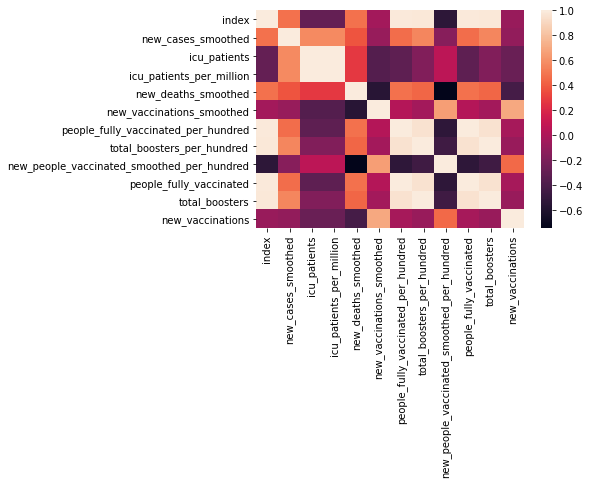

In [299]:
sns.heatmap(location_df.corr())

In [300]:
#location_df = location_df.astype({'icu_patients_per_million':'int'})

<AxesSubplot:xlabel='date'>

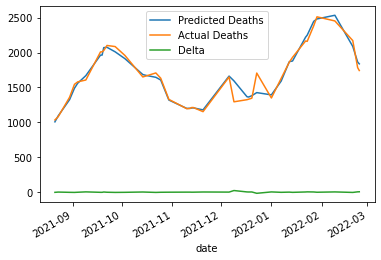

In [301]:
location_df['date'] = pd.to_datetime(location_df['date'])
location_df = location_df.set_index('date')

# Target: what you're predicting -- your dependent variable
y = location_df['new_deaths_smoothed']

# Features: what you think affects your target -- your independent variables
X = location_df[['new_cases_smoothed',
                 'icu_patients',
                 'new_vaccinations_smoothed',
                 'people_fully_vaccinated',
                 'total_boosters',
                 'new_vaccinations']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Model Fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results
y_test_df = pd.DataFrame(y_test)

y_pred_df = pd.DataFrame(y_pred, index = y_test_df.index)
res = pd.concat([y_pred_df, y_test_df], axis = 1)
res.columns = ['Predicted Deaths', 'Actual Deaths']
res['Delta'] = ((res['Predicted Deaths'] - res['Actual Deaths'])/res['Actual Deaths']) * 100

# Plot
res.plot()

In [302]:
# mean squared error calculation to determine accuracy of randomforestregressor model
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Squared Error {model} = {rms}')

Mean Squared Error RandomForestRegressor() = 79.75337404670712


<AxesSubplot:xlabel='date'>

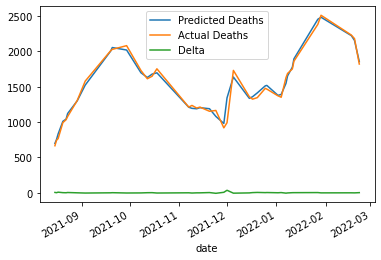

In [303]:
#location_df['date'] = pd.to_datetime(location_df['date'])
#location_df = location_df.set_index('date')

# Target: what you're predicting -- your dependent variable
y = location_df['new_deaths_smoothed']

# Features: what you think affects your target -- your independent variables
X = location_df[['new_cases_smoothed',
                 'icu_patients',
                 'new_vaccinations_smoothed',
                 'people_fully_vaccinated',
                 'total_boosters',
                 'new_vaccinations']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Model Fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results
y_test_df = pd.DataFrame(y_test)

y_pred_df = pd.DataFrame(y_pred, index = y_test_df.index)
res = pd.concat([y_pred_df, y_test_df], axis = 1)
res.columns = ['Predicted Deaths', 'Actual Deaths']
res['Delta'] = ((res['Predicted Deaths'] - res['Actual Deaths'])/res['Actual Deaths']) * 100

# Plot
res.plot()

## Looping through every country

In [282]:
clean_selection['location'].value_counts()

Germany           426
Switzerland       420
Estonia           411
Canada            380
France            372
Denmark           335
South Korea       323
Israel            242
Czechia           242
Slovenia          235
Chile             197
United States     197
Malaysia          180
Belgium           168
Italy             168
United Kingdom    146
Ireland           146
Australia         143
Singapore         142
Portugal          141
Bolivia           131
Malta             105
Argentina          67
Spain              66
Luxembourg         57
Serbia             43
Finland            30
Cyprus             16
Japan               7
Sweden              2
Bulgaria            1
Name: location, dtype: int64

Argentina
Australia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Belgium
Bolivia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Bulgaria
Not enough data! :(((((
Canada
Chile


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Cyprus
Czechia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Denmark
Estonia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Finland
France


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Germany
Ireland


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Israel
Italy


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Japan
Luxembourg
Malaysia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Malta
Portugal


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inter

Serbia
Singapore


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Slovenia
South Korea
Spain


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Sweden
Switzerland


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


United Kingdom
United States


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Predicted Deaths,Actual Deaths,Delta,Country
date,,,,
2022-01-28,251.04545,241.143,4.106464,Argentina
2021-12-27,16.16840,19.429,-16.782130,Argentina
2022-02-01,260.00736,258.571,0.555499,Argentina
2022-02-03,256.85700,257.143,-0.111222,Argentina
2022-01-23,201.10691,161.143,24.800277,Argentina
...,...,...,...,...
2021-11-16,1213.57571,1199.143,1.203585,United States
2021-10-31,1301.83593,1326.714,-1.875165,United States
2021-08-25,1165.75554,1180.857,-1.278856,United States


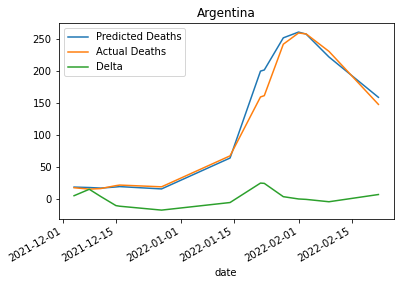

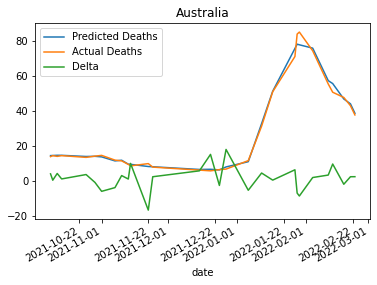

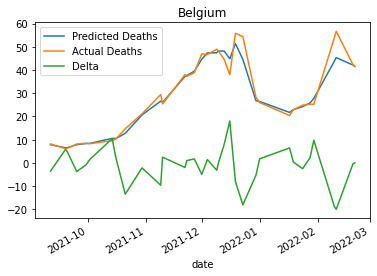

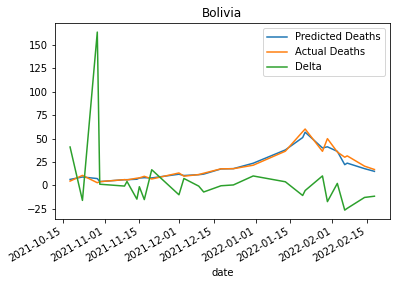

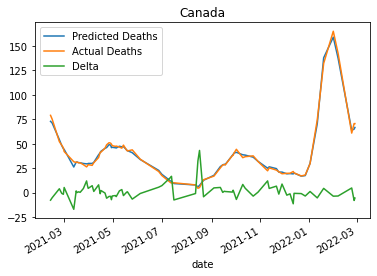

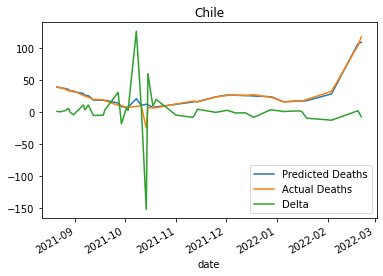

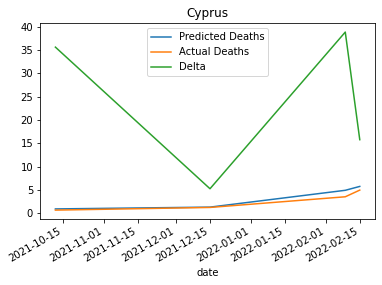

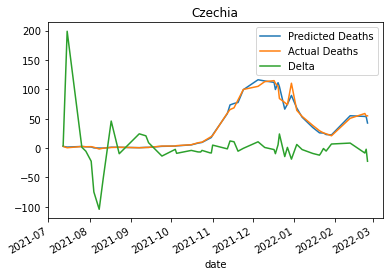

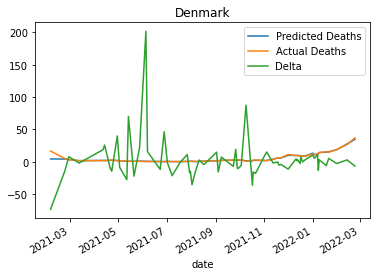

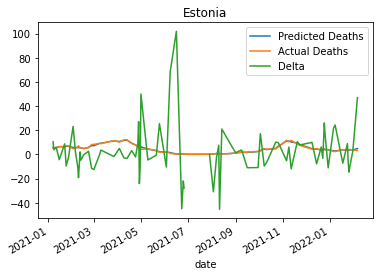

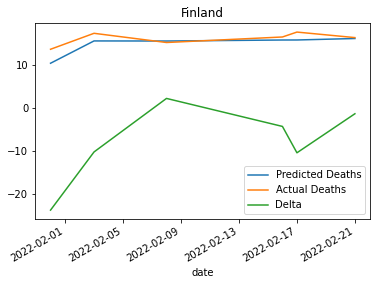

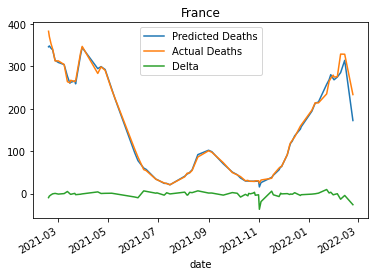

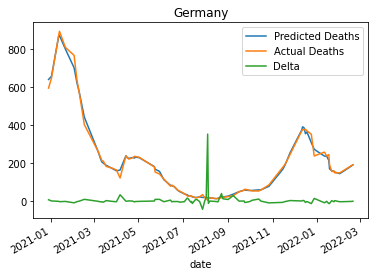

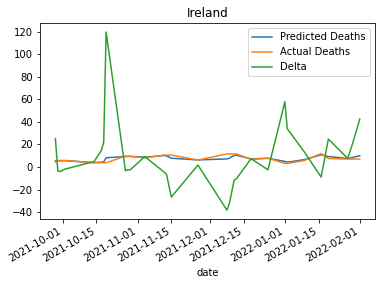

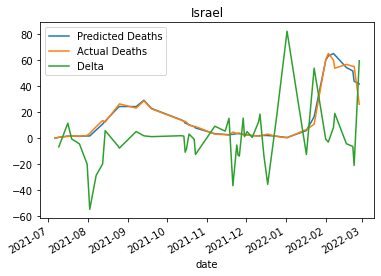

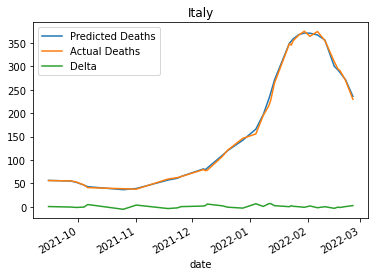

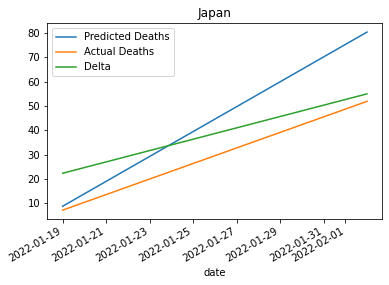

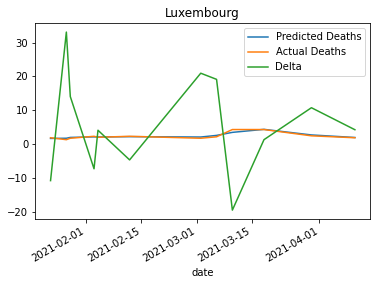

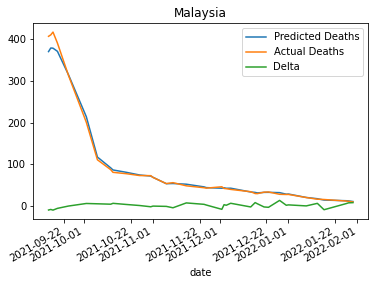

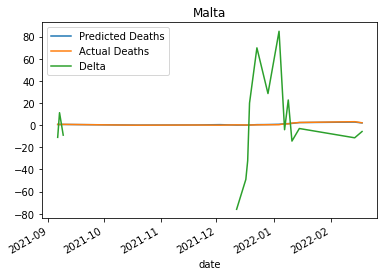

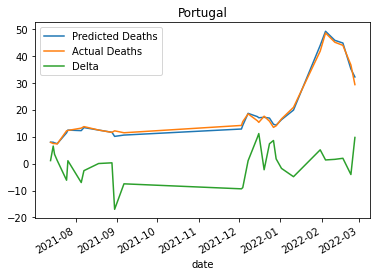

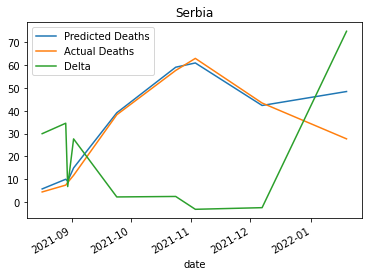

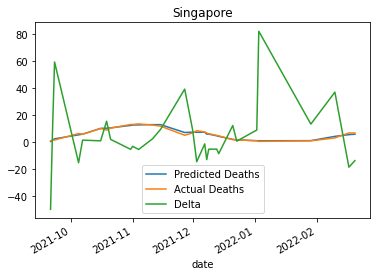

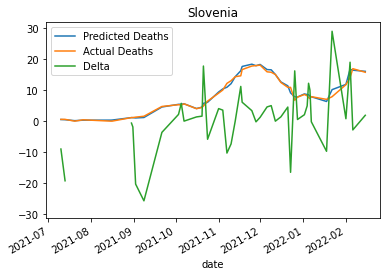

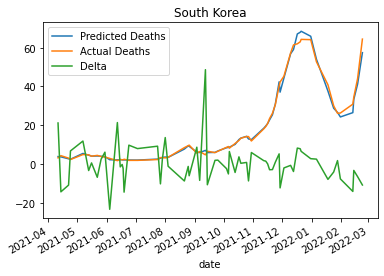

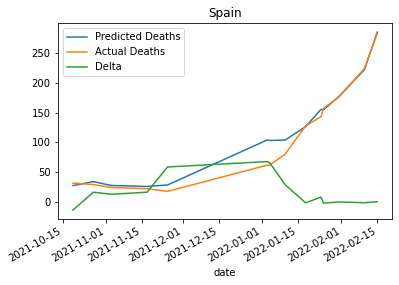

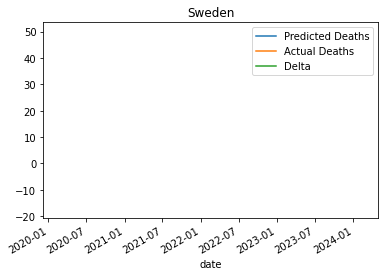

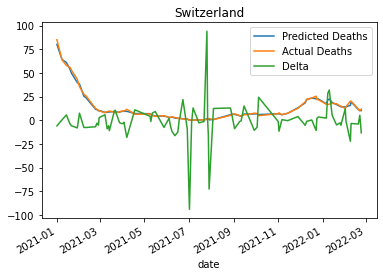

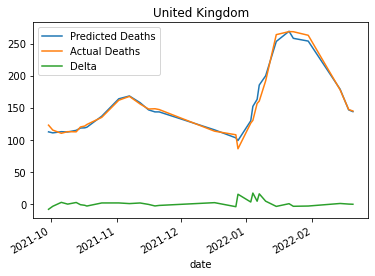

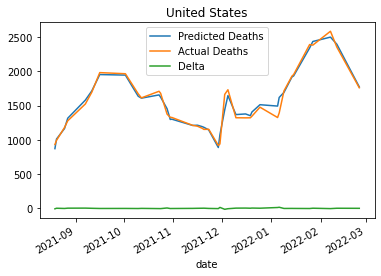

In [283]:
all_countries = clean_selection['location'].unique()
all_results = []
for country in all_countries:
    
    print(country)
    
    location_df = clean_selection[clean_selection['location'] == country]
    
    location_df['date'] = pd.to_datetime(location_df['date'])
    location_df = location_df.set_index('date')

    # Target: what you're predicting -- your dependent variable
    y = location_df['new_deaths_smoothed']

    # Features: what you think affects your target -- your independent variables
    X = location_df[['new_cases_smoothed',
                     'icu_patients',
                     'new_vaccinations_smoothed',
                     'people_fully_vaccinated',
                     'total_boosters',
                     'new_vaccinations']]
    
    try:

        # Train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        # Model Fit
        model = RandomForestRegressor()
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Results
        y_test_df = pd.DataFrame(y_test)

        y_pred_df = pd.DataFrame(y_pred, index = y_test_df.index)
        res = pd.concat([y_pred_df, y_test_df], axis = 1)
        res.columns = ['Predicted Deaths', 'Actual Deaths']
        res['Delta'] = ((res['Predicted Deaths'] - res['Actual Deaths'])/res['Actual Deaths']) * 100
        res['Country'] = country

        # Plot
        res.plot(title = country)
        all_results.append(res)
    except:
        print('Not enough data! :(((((')
        
pd.concat(all_results)